In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
data = pd.read_csv('totaldamage_data2.csv')

In [49]:
# Convert 'Year' to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set 'Year' as the index
#data.set_index('Year', inplace=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Display the first few rows to verify
data.head()

C:\Users\MainUser\AppData\Local\Temp\ipykernel_7204\3741942418.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Damage,Classification Key,Latitude,Longitude,Total Affected,Year,NY.GDP.PCAP.CD,SP.POP.TOTL,Country Code,Indicator Name,CO2 emissions (kt)
0,Natural,Drought,Djibouti,Africa,7.0,336078.257812,nat-cli-dro-dro,11.685,42.680,100000.0,2001-01-01,747.779123,765490,DJI,CO2 emissions (kt),376.50
1,Natural,Drought,Sudan,Africa,36.5,525786.666667,nat-cli-dro-dro,10.763,27.364,2000000.0,2000-01-01,378.157501,26298773,SDN,CO2 emissions (kt),5690.74
2,Natural,Epidemic,Sudan,Africa,186.0,525786.666667,nat-bio-epi-bac,10.763,27.364,2363.0,2000-01-01,378.157501,26298773,SDN,CO2 emissions (kt),5690.74
3,Natural,Drought,Somalia,Africa,21.0,525786.666667,nat-cli-dro-dro,0.780,39.720,1200000.0,2000-01-01,454.077264,8721465,SOM,CO2 emissions (kt),486.60
4,Natural,Epidemic,Somalia,Africa,230.0,525786.666667,nat-bio-epi-bac,0.780,39.720,2232.0,2000-01-01,454.077264,8721465,SOM,CO2 emissions (kt),486.60


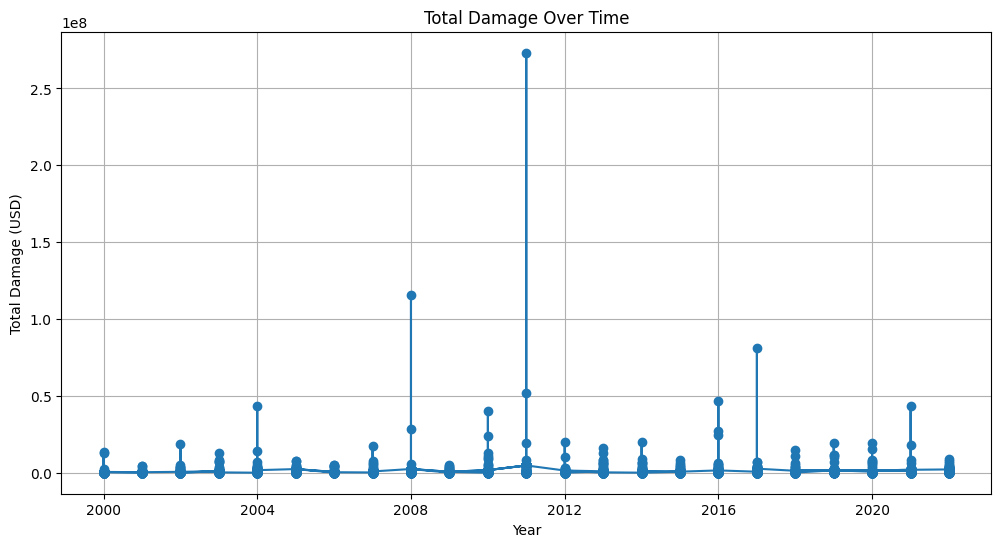

In [32]:
# Plot the total damage over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total Damage'], marker='o', linestyle='-')
plt.title('Total Damage Over Time')
plt.xlabel('Year')
plt.ylabel('Total Damage (USD)')
plt.grid(True)
plt.show()


In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model
model = ARIMA(data['Total Damage'], order=(1, 1, 1))  # (p, d, q) values to be tuned

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but 

                               SARIMAX Results                                
Dep. Variable:           Total Damage   No. Observations:                 7936
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -131586.914
Date:                Wed, 05 Jun 2024   AIC                         263179.829
Time:                        13:36:57   BIC                         263200.766
Sample:                             0   HQIC                        263186.998
                               - 7936                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0041      0.009      0.460      0.645      -0.013       0.021
ma.L1         -0.9812      0.001   -817.523      0.000      -0.984      -0.979
sigma2      1.771e+13   3.22e-15    5.5e+27      0.0

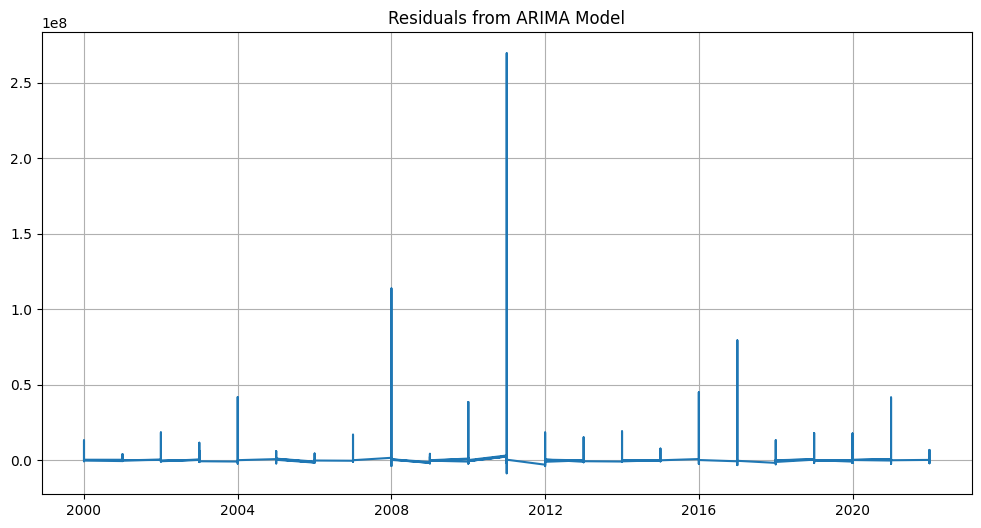

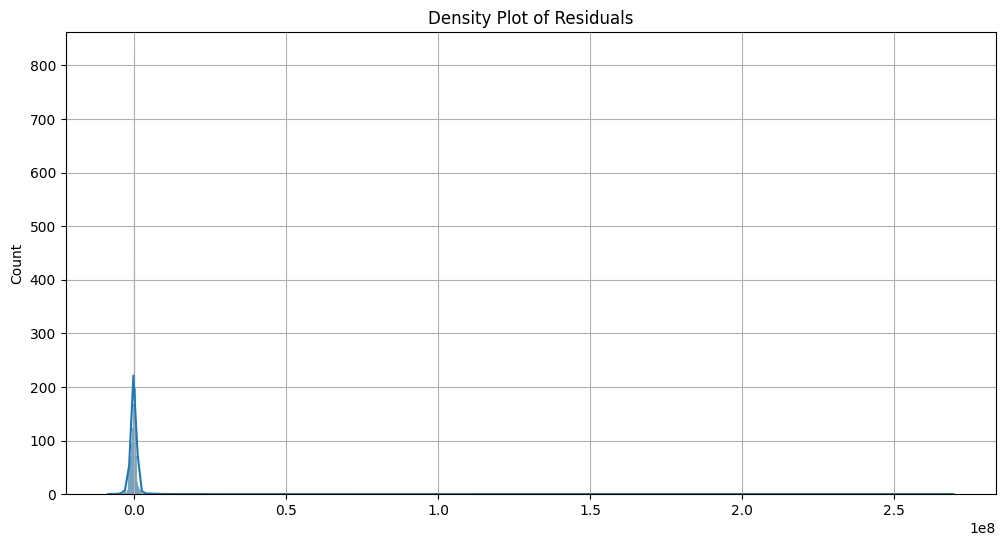

Mean Squared Error: 14571223329727.445


In [34]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.grid(True)
plt.show()

# Plot density of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Density Plot of Residuals')
plt.grid(True)
plt.show()

# Mean Squared Error
mse = np.mean(residuals**2)
print(f'Mean Squared Error: {mse}')


FEATURE ENGINEERING

In [35]:
# Create new features: damage per GDP and damage per population
data['Damage per GDP'] = data['Total Damage'] / data['NY.GDP.PCAP.CD']
data['Damage per Population'] = data['Total Damage'] / data['SP.POP.TOTL']

# Log-transform to reduce skewness
data['Log Total Damage'] = np.log(data['Total Damage'] + 1)
data['Log Damage per GDP'] = np.log(data['Damage per GDP'] + 1)
data['Log Damage per Population'] = np.log(data['Damage per Population'] + 1)

# Drop NA values if any
data.dropna(inplace=True)

# Display the first few rows to verify
print(data.head())


           Disaster Group Disaster Type   Country  Region  Total Deaths  \
Year                                                                      
2001-01-01        Natural       Drought  Djibouti  Africa           7.0   
2000-01-01        Natural       Drought     Sudan  Africa          36.5   
2000-01-01        Natural      Epidemic     Sudan  Africa         186.0   
2000-01-01        Natural       Drought   Somalia  Africa          21.0   
2000-01-01        Natural      Epidemic   Somalia  Africa         230.0   

             Total Damage Classification Key  Latitude  Longitude  \
Year                                                                
2001-01-01  336078.257812    nat-cli-dro-dro    11.685     42.680   
2000-01-01  525786.666667    nat-cli-dro-dro    10.763     27.364   
2000-01-01  525786.666667    nat-bio-epi-bac    10.763     27.364   
2000-01-01  525786.666667    nat-cli-dro-dro     0.780     39.720   
2000-01-01  525786.666667    nat-bio-epi-bac     0.780     3

In [36]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pmdarima as pm

# Fit auto_arima to find the best model
model = pm.auto_arima(data['Log Total Damage'], 
                      seasonal=False, 
                      trace=True, 
                      error_action='ignore', 
                      suppress_warnings=True, 
                      stepwise=True)

# Print the best model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32286.904, Time=13.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36980.035, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34788.332, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32384.775, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36978.035, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32313.056, Time=3.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=32316.988, Time=4.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32345.393, Time=2.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=9.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=32312.387, Time=6.52 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=32288.217, Time=12.68 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=4.15 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] int

In [50]:
data.columns

Index(['Disaster Group', 'Disaster Type', 'Country', 'Region', 'Total Deaths',
       'Total Damage', 'Classification Key', 'Latitude', 'Longitude',
       'Total Affected', 'Year', 'NY.GDP.PCAP.CD', 'SP.POP.TOTL',
       'Country Code', 'Indicator Name', 'CO2 emissions (kt)'],
      dtype='object')

In [51]:
#Year 2001
filter_22 = data[data['Year'] == '2001-01-01']
filter_22

,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Damage,Classification Key,Latitude,Longitude,Total Affected,Year,NY.GDP.PCAP.CD,SP.POP.TOTL,Country Code,Indicator Name,CO2 emissions (kt)
0,Natural,Drought,Djibouti,Africa,7.0,336078.257812,nat-cli-dro-dro,11.6850,42.6800,100000.0,2001-01-01,747.779123,765490,DJI,CO2 emissions (kt),376.5
440,Natural,Storm,China,Asia,49.0,19834.000000,nat-met-sto-bli,19.1600,109.8200,2574871.0,2001-01-01,1053.112314,1271850000,CHN,CO2 emissions (kt),3529081.3
441,Natural,Earthquake,China,Asia,3.0,39667.000000,nat-geo-ear-gro,29.5130,101.1290,300109.0,2001-01-01,1053.112314,1271850000,CHN,CO2 emissions (kt),3529081.3
442,Natural,Earthquake,China,Asia,2.0,51237.000000,nat-geo-ear-gro,24.7680,99.0610,150190.0,2001-01-01,1053.112314,1271850000,CHN,CO2 emissions (kt),3529081.3
443,Natural,Earthquake,China,Asia,2.0,59501.000000,nat-geo-ear-gro,27.6890,101.0030,10605.0,2001-01-01,1053.112314,1271850000,CHN,CO2 emissions (kt),3529081.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,Natural,Flood,Myanmar,Asia,51.0,336078.257812,nat-hyd-flo-riv,3.2950,95.9820,3750.0,2001-01-01,140.776164,46014826,MMR,CO2 emissions (kt),8351.8
802,Natural,Flood,Norway,Europe,7.0,336078.257812,nat-hyd-flo-flo,59.9139,10.7522,1500.0,2001-01-01,38601.897639,4513751,NOR,CO2 emissions (kt),34735.2
803,Natural,Extreme temperature,New Zealand,Oceania,2.0,330559.000000,nat-met-ext-hea,-45.6900,170.3700,345.0,2001-01-01,13882.856827,3880500,NZL,CO2 emissions (kt),31618.8
804,Natural,Flood,Bosnia and Herzegovina,Europe,2.0,336078.257812,nat-hyd-flo-riv,43.5000,18.1800,9000.0,2001-01-01,1382.767460,4194932,BIH,CO2 emissions (kt),13763.7


In [52]:
# 'Year' formatted
#data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# `annual_summary` contains the necessary time series data
annual_summary = data.groupby(data['Year'].dt.year).agg({
    'Total Damage': 'sum',
    'NY.GDP.PCAP.CD': 'mean',
    'SP.POP.TOTL': 'mean'
}).reset_index()

# 'Log Total Damage' columns
annual_summary['Log Total Damage'] = np.log(annual_summary['Total Damage'] + 1)

In [53]:
annual_summary

,Year,Total Damage,NY.GDP.PCAP.CD,SP.POP.TOTL,Log Total Damage
0,2000,2.115533e+08,4248.549955,1.800219e+08,19.169987
1,2001,1.147442e+08,4116.807744,2.221385e+08,18.558216
2,2002,2.318418e+08,5364.553891,1.845305e+08,19.261566
3,2003,3.302886e+08,7136.833111,1.988258e+08,19.615477
4,2004,4.993022e+08,6683.814341,1.714653e+08,20.028722
5,2005,7.791924e+08,6361.078549,2.296001e+08,20.473768
6,2006,1.866200e+08,6009.428098,2.369152e+08,19.044585
7,2007,3.093406e+08,6936.164509,1.763402e+08,19.549953
8,2008,7.614789e+08,7099.094291,2.106858e+08,20.450773
9,2009,2.021806e+08,7765.712102,2.078283e+08,19.124672


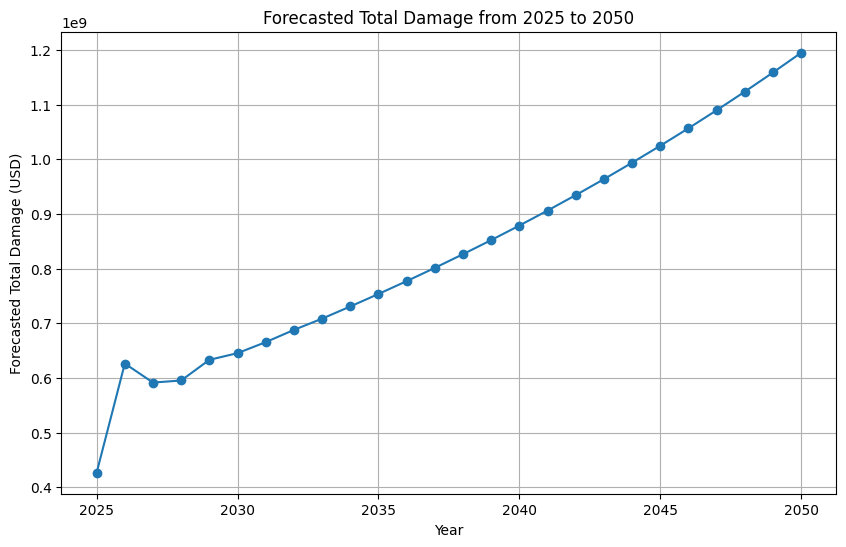

In [54]:

# Fit the ARIMA model with the identified best configuration

model = pm.ARIMA(order=(2,1,2), seasonal_order=(0,0,0,0), with_intercept=True)
model.fit(annual_summary['Log Total Damage'])

# Forcast from 2025 to 2050
forecast_years = np.arange(2025, 2051)
forecast = model.predict(n_periods=len(forecast_years))

# Scale forecast
forecast_original_scale = np.exp(forecast) - 1

# Visualize forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_years, forecast_original_scale, marker='o', linestyle='-')
plt.title('Forecasted Total Damage from 2025 to 2050')
plt.xlabel('Year')
plt.ylabel('Forecasted Total Damage (USD)')
plt.grid(True)
plt.show()


Regions Report

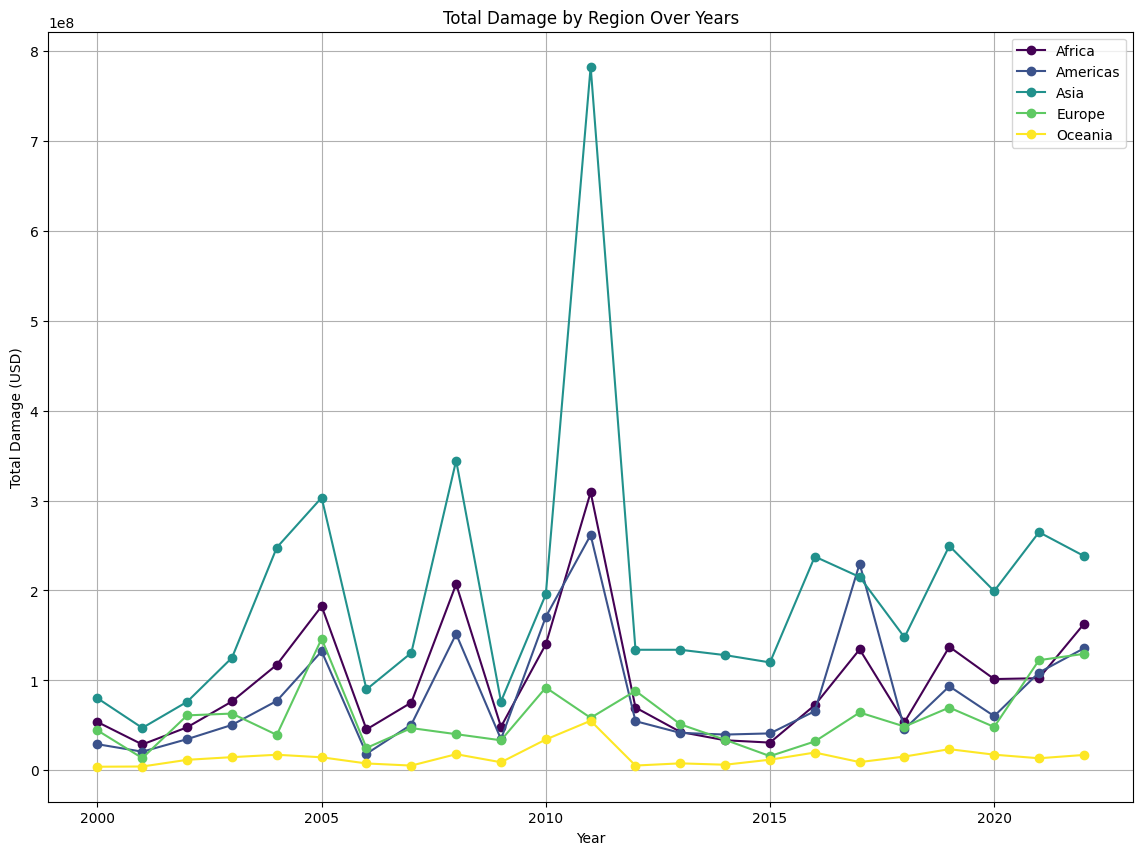

In [57]:
# Group data by region and year, and calculate annual summaries
region_summary = data.groupby(['Region', data['Year'].dt.year]).agg({
    'Total Damage': 'sum',
    'NY.GDP.PCAP.CD': 'mean',
    'SP.POP.TOTL': 'mean'
}).reset_index()

# Add 'Log Total Damage' column
region_summary['Log Total Damage'] = np.log(region_summary['Total Damage'] + 1)
# Plot the existing total damage for each region over the years
plt.figure(figsize=(14, 10))
regions = region_summary['Region'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(regions)))

for i, region in enumerate(regions):
    region_data = region_summary[region_summary['Region'] == region]
    plt.plot(region_data['Year'], region_data['Total Damage'], marker='o', linestyle='-', color=colors[i], label=region)

plt.title('Total Damage by Region Over Years')
plt.xlabel('Year')
plt.ylabel('Total Damage (USD)')
plt.legend()
plt.grid(True)
plt.show()


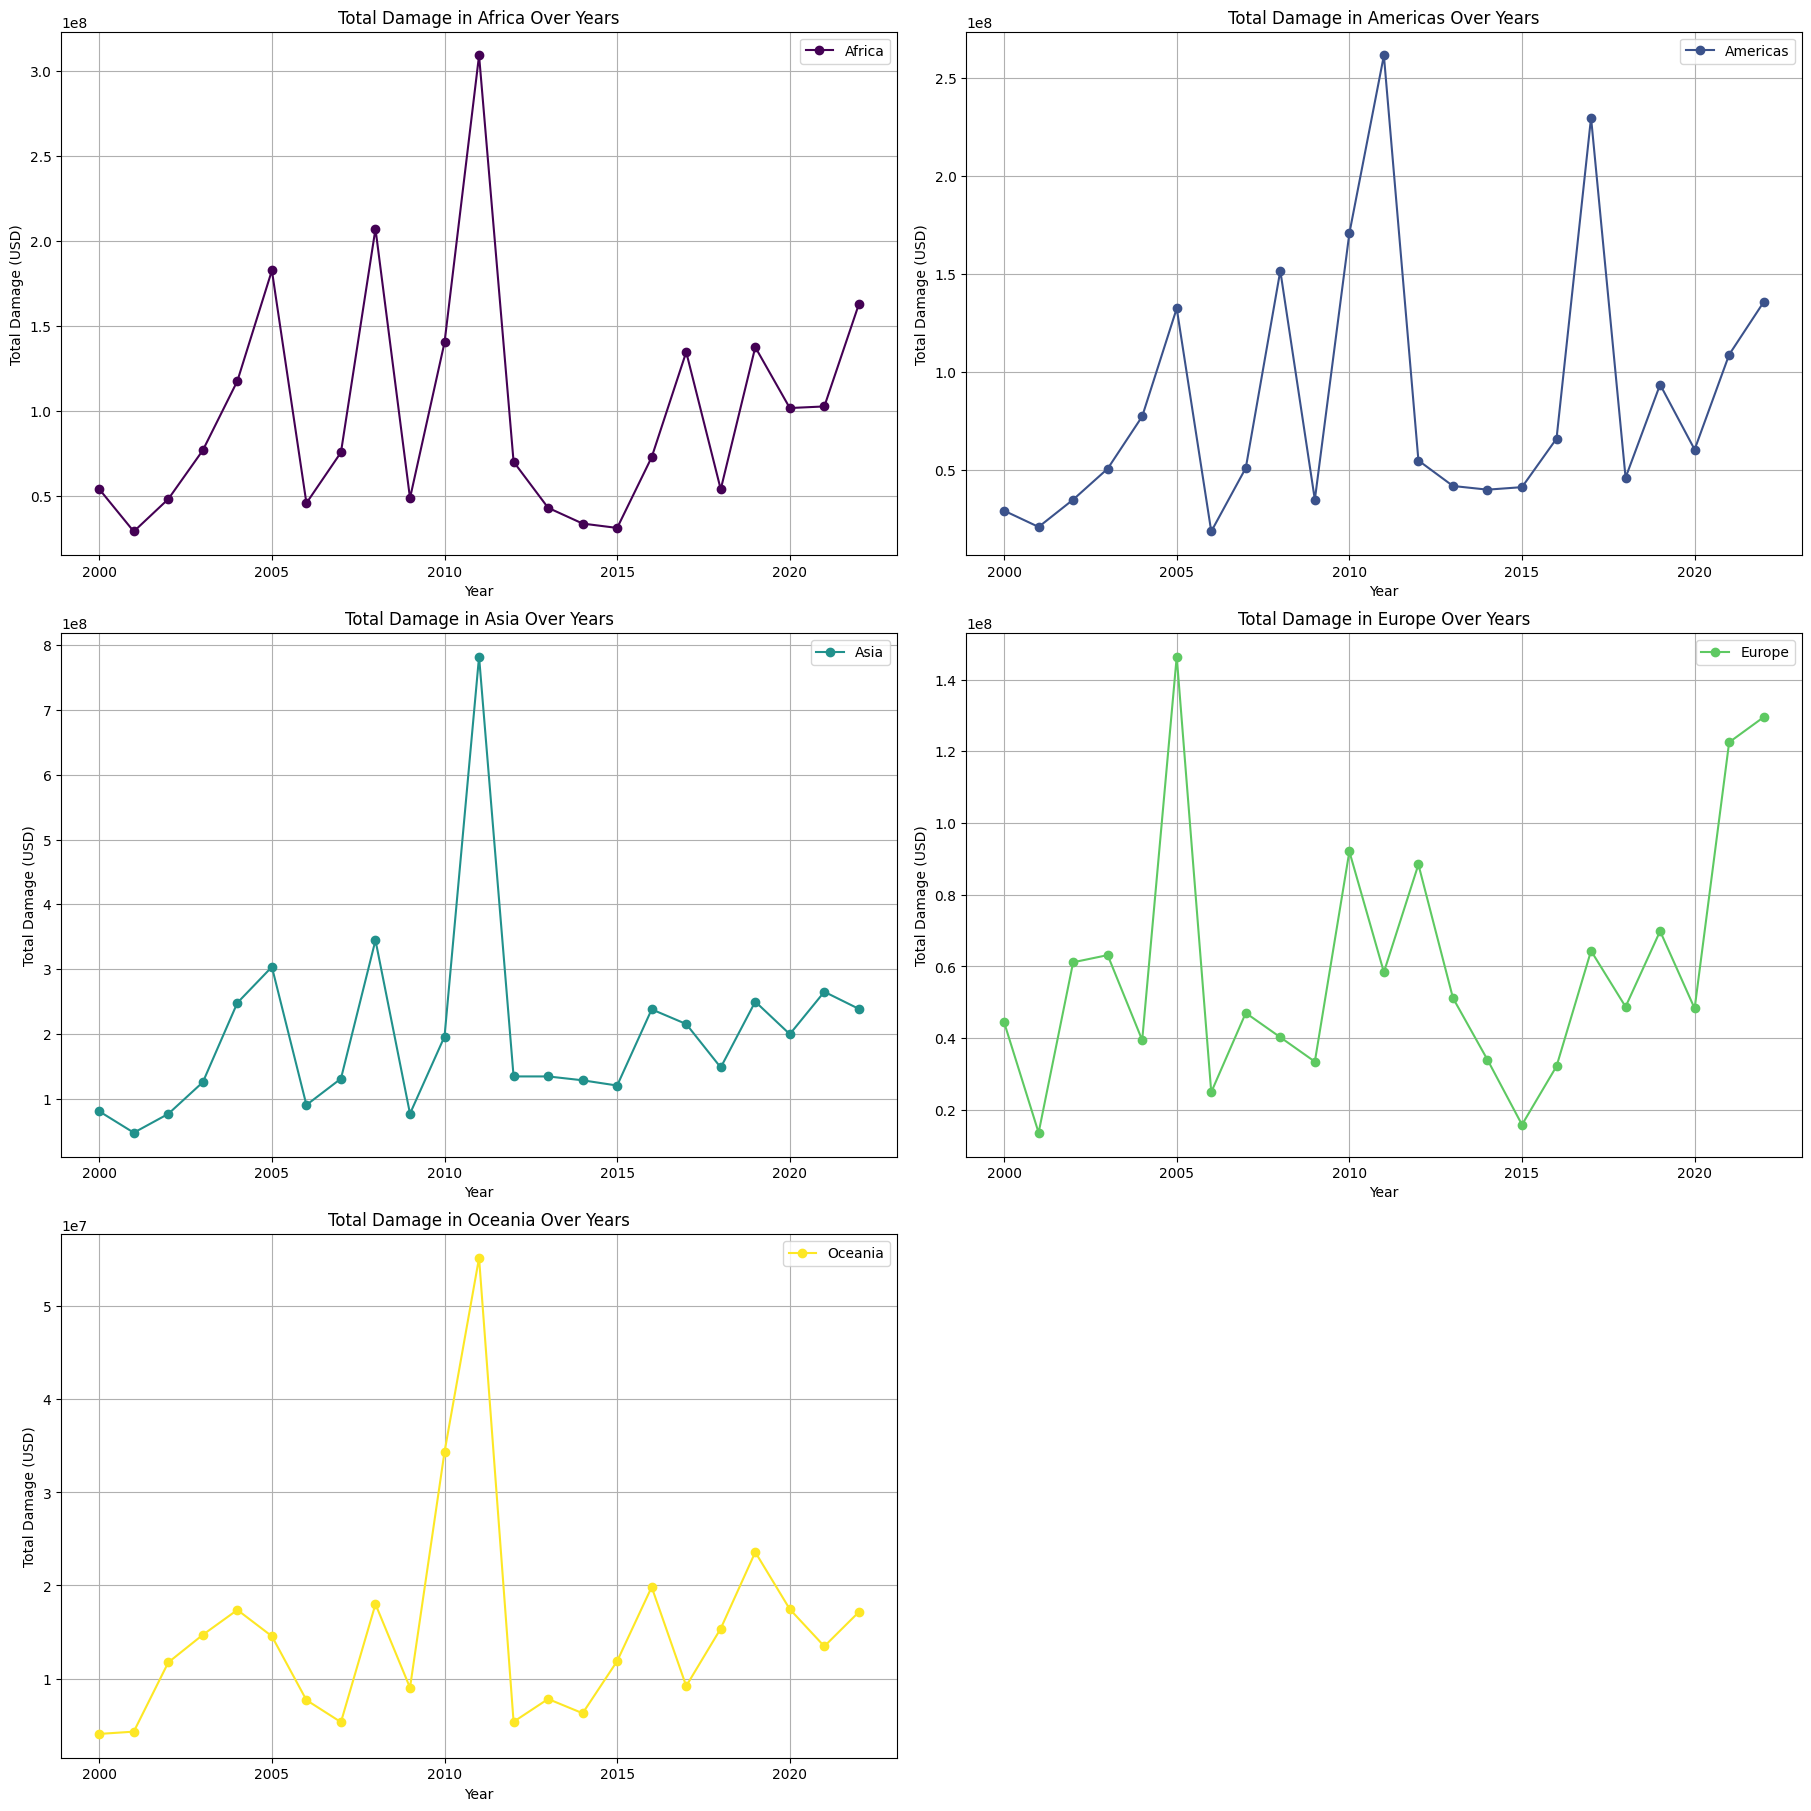

In [60]:
# Get unique regions
regions = region_summary['Region'].unique()

# Determine number of rows and columns for subplots
num_regions = len(regions)
cols = 2
rows = (num_regions // cols) + (num_regions % cols)

# Set up the subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 6*rows), constrained_layout=True)
axes = axes.flatten()

# Colors for each region
colors = plt.cm.viridis(np.linspace(0, 1, num_regions))

# Plot the existing total damage for each region over the years
for i, region in enumerate(regions):
    region_data = region_summary[region_summary['Region'] == region]
    axes[i].plot(region_data['Year'], region_data['Total Damage'], marker='o', linestyle='-', color=colors[i], label=region)
    axes[i].set_title(f'Total Damage in {region} Over Years')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Damage (USD)')
    axes[i].grid(True)
    axes[i].legend()

# Remove any empty subplots
if num_regions < len(axes):
    for j in range(num_regions, len(axes)):
        fig.delaxes(axes[j])

plt.show()


In [55]:
# Group by relegion and year
region_summary = data.groupby(['Region', data['Year'].dt.year]).agg({
    'Total Damage': 'sum',
    'NY.GDP.PCAP.CD': 'mean',
    'SP.POP.TOTL': 'mean'
}).reset_index()

# 'Log Total Damage' additional
region_summary['Log Total Damage'] = np.log(region_summary['Total Damage'] + 1)

c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result i

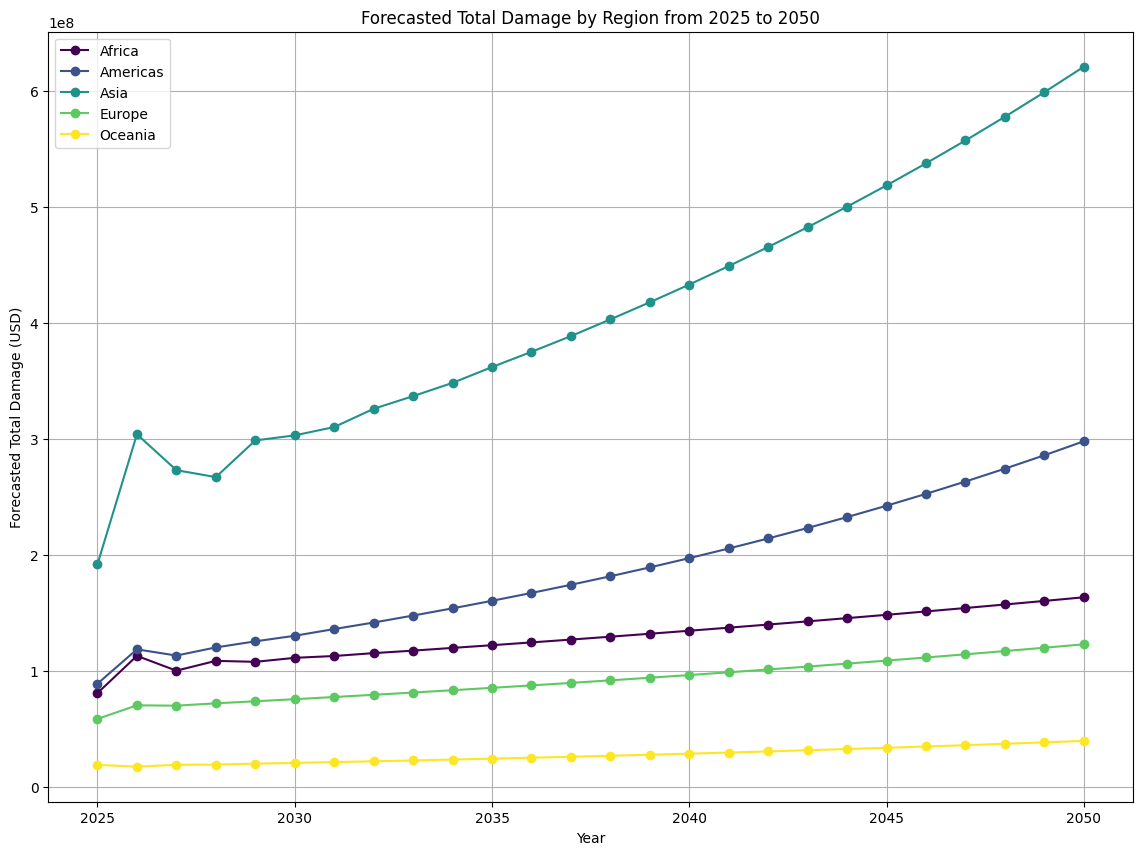

In [56]:
# unique region_summary
regions = region_summary['Region'].unique()

# Her bir bölge için tahmin ve görselleştirme
plt.figure(figsize=(14, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(regions)))

for i, region in enumerate(regions):
    # filter_region_summary
    region_data = region_summary[region_summary['Region'] == region]
    
    # Fitting ARIMA model
    model = pm.ARIMA(order=(2,1,2), seasonal_order=(0,0,0,0), with_intercept=True)
    model.fit(region_data['Log Total Damage'])
    
    # Forecesat from 2025 to 2050  
    forecast_years = np.arange(2025, 2051)
    forecast = model.predict(n_periods=len(forecast_years))
    forecast_original_scale = np.exp(forecast) - 1
    
    # Visualization
    plt.plot(forecast_years, forecast_original_scale, marker='o', linestyle='-', color=colors[i], label=region)

plt.title('Forecasted Total Damage by Region from 2025 to 2050')
plt.xlabel('Year')
plt.ylabel('Forecasted Total Damage (USD)')
plt.legend()
plt.grid(True)
plt.show()


GAMA Forecast

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pmdarima as pm
# Function to forecast total damage using Gamma distribution
def forecast_damage(region_data):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(region_data[['Year', 'NY.GDP.PCAP.CD', 'SP.POP.TOTL']])
    
    # Prepare the target variable
    y = region_data['Log Total Damage']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Fit the GLM model with a gamma distribution
    glm = TweedieRegressor(power=2, link='log')
    glm.fit(X_train, y_train)
    
    # Predict for the years 2025 to 2050
    forecast_years = np.arange(2025, 2051)
    gdp_growth = (region_data['NY.GDP.PCAP.CD'].iloc[-1] / region_data['NY.GDP.PCAP.CD'].iloc[0]) ** (1 / (region_data['Year'].iloc[-1] - region_data['Year'].iloc[0])) - 1
    pop_growth = (region_data['SP.POP.TOTL'].iloc[-1] / region_data['SP.POP.TOTL'].iloc[0]) ** (1 / (region_data['Year'].iloc[-1] - region_data['Year'].iloc[0])) - 1

    forecast_gdp = [region_data['NY.GDP.PCAP.CD'].iloc[-1] * (1 + gdp_growth) ** (year - region_data['Year'].max()) for year in forecast_years]
    forecast_pop = [region_data['SP.POP.TOTL'].iloc[-1] * (1 + pop_growth) ** (year - region_data['Year'].max()) for year in forecast_years]
    
    forecast_X = scaler.transform(np.column_stack((forecast_years, forecast_gdp, forecast_pop)))
    log_damage_forecast = glm.predict(forecast_X)
    damage_forecast = np.exp(log_damage_forecast) - 1
    
    return forecast_years, damage_forecast


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, b

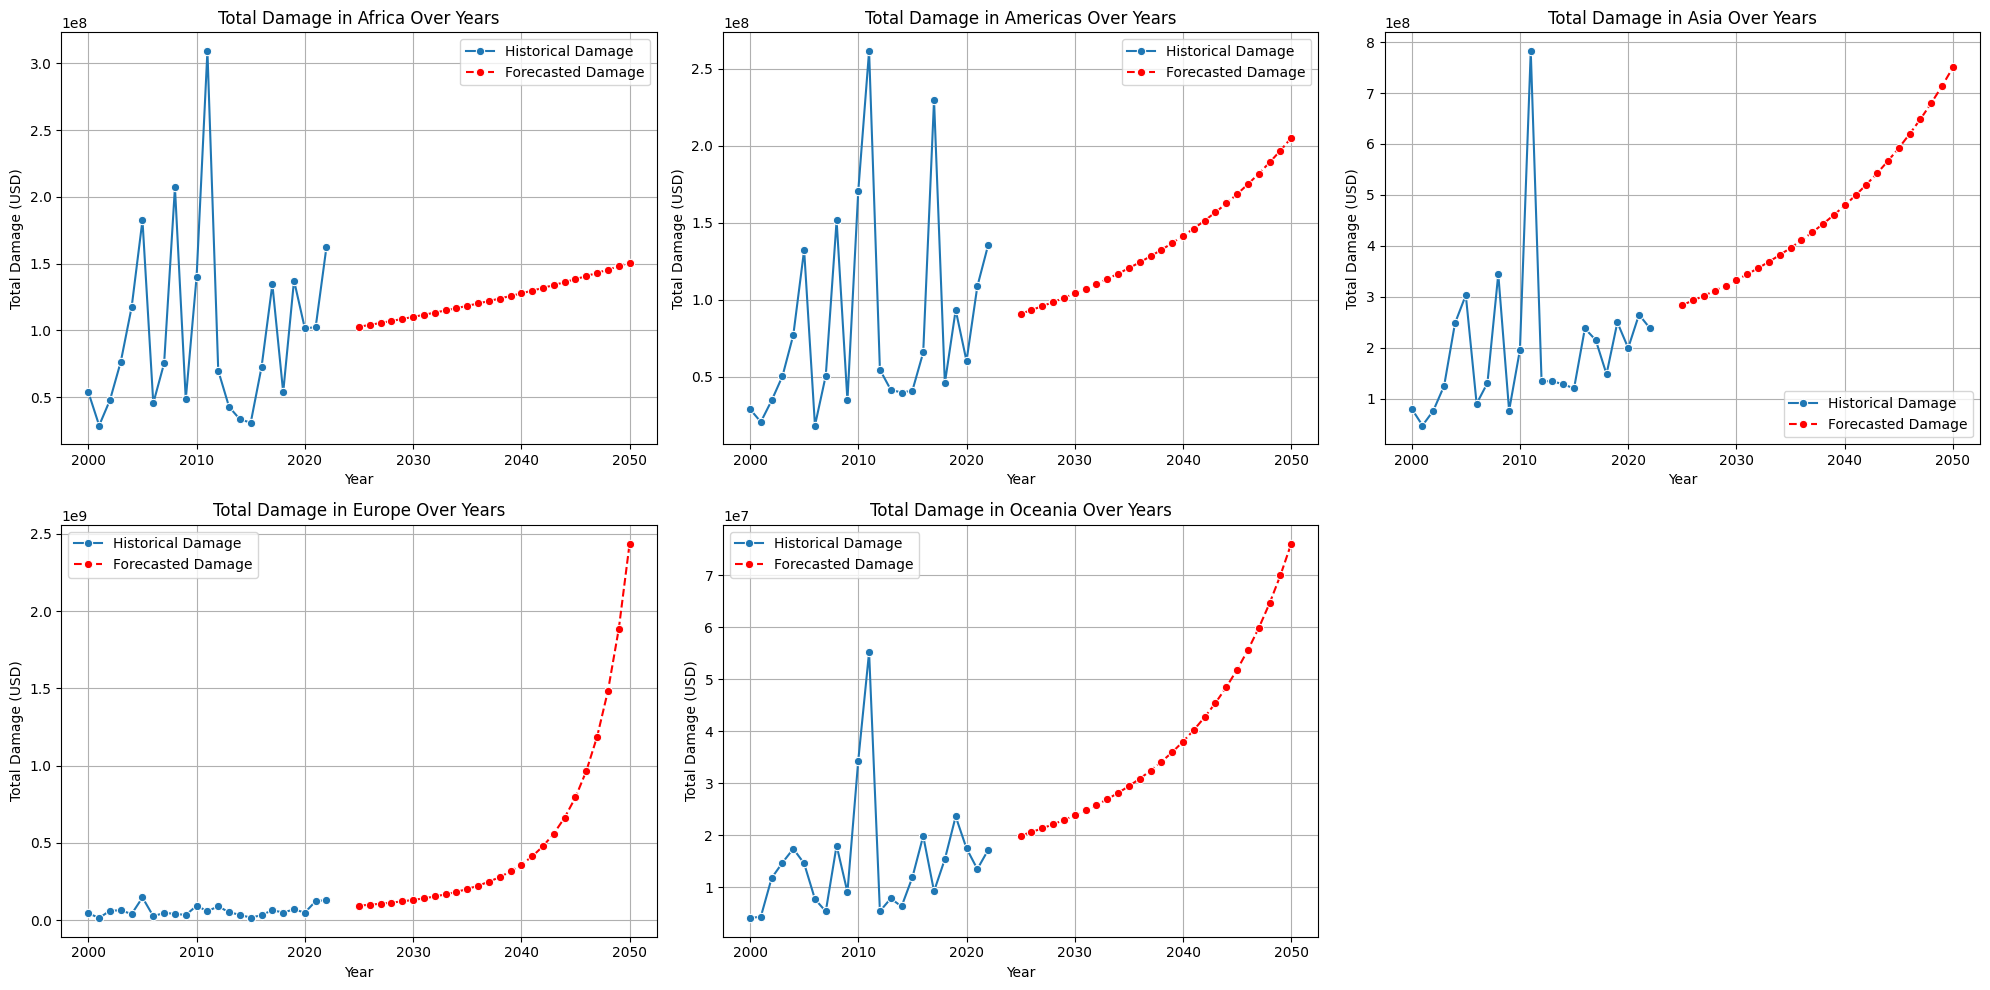

In [64]:
# Create subplots for each region
regions = region_summary['Region'].unique()
num_regions = len(regions)
num_cols = 3
num_rows = (num_regions + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, region in enumerate(regions):
    region_data = region_summary[region_summary['Region'] == region]
    forecast_years, damage_forecast = forecast_damage(region_data)
    
    sns.lineplot(x='Year', y='Total Damage', data=region_data, ax=axes[i], marker='o', label='Historical Damage')
    sns.lineplot(x=forecast_years, y=damage_forecast, ax=axes[i], marker='o', linestyle='--', color='red', label='Forecasted Damage')
    
    axes[i].set_title(f'Total Damage in {region} Over Years')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Damage (USD)')
    axes[i].legend()
    axes[i].grid(True)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
